In [ ]:
suppressMessages(suppressWarnings({
  library(Seurat)
  library(SeuratDisk)
  library(schard) 
  library(patchwork)
  library(ggplot2)
  library(reshape2)
  library(ProjecTILs)
  library(BiocParallel)
  library(scales)
  }))

### Cargamos el archivo Seurat

In [2]:
seurat_object <- readRDS("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/Seurat_concatenados_10_pt.rds")

In [3]:
# Cargar el atlas de células T CD4+ humanas
ref_cd4_human <- load.reference.map(ref = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Atlas_scRNA/CD4T_human_ref_v1.rds")

[1] "Loading Custom Reference Atlas..."
[1] "Loaded Custom Reference map custom_reference"


In [4]:
# Cargar el atlas de células T CD8+ humanas
ref_cd8_human <- load.reference.map(ref = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Atlas_scRNA/CD8T_human_ref_v1.rds")

[1] "Loading Custom Reference Atlas..."
[1] "Loaded Custom Reference map Human CD8 TILs"


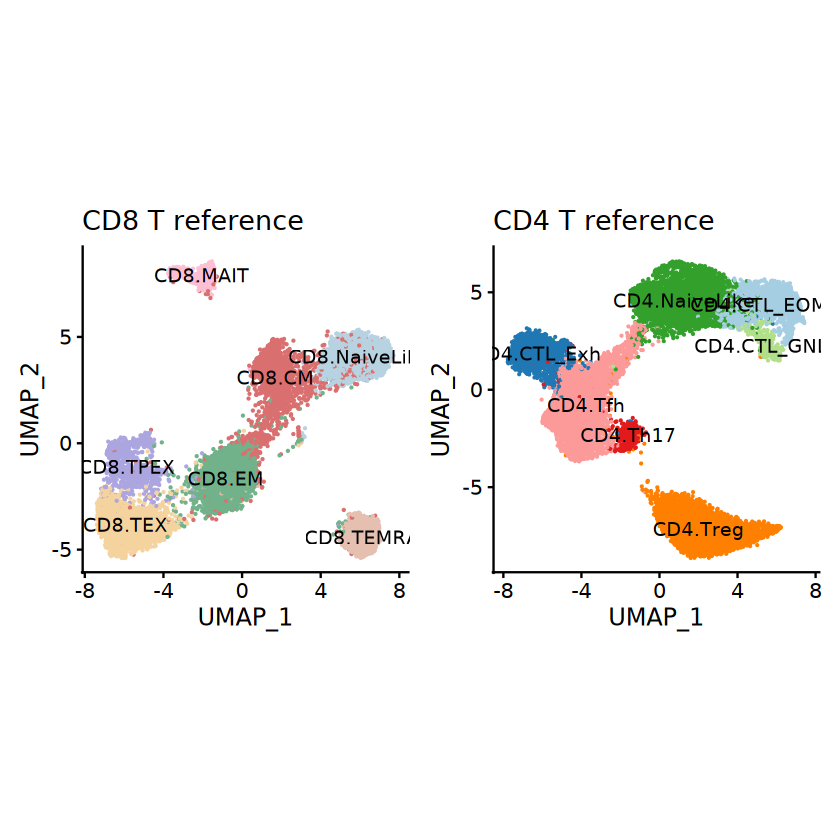

In [5]:
a <- DimPlot(ref_cd8_human, cols = ref_cd8_human@misc$atlas.palette, label = T) + theme(aspect.ratio = 1) +
    ggtitle("CD8 T reference") + NoLegend()

b <- DimPlot(ref_cd4_human, cols = ref_cd4_human@misc$atlas.palette, label = T) + theme(aspect.ratio = 1) +
    ggtitle("CD4 T reference") + NoLegend()

a | b

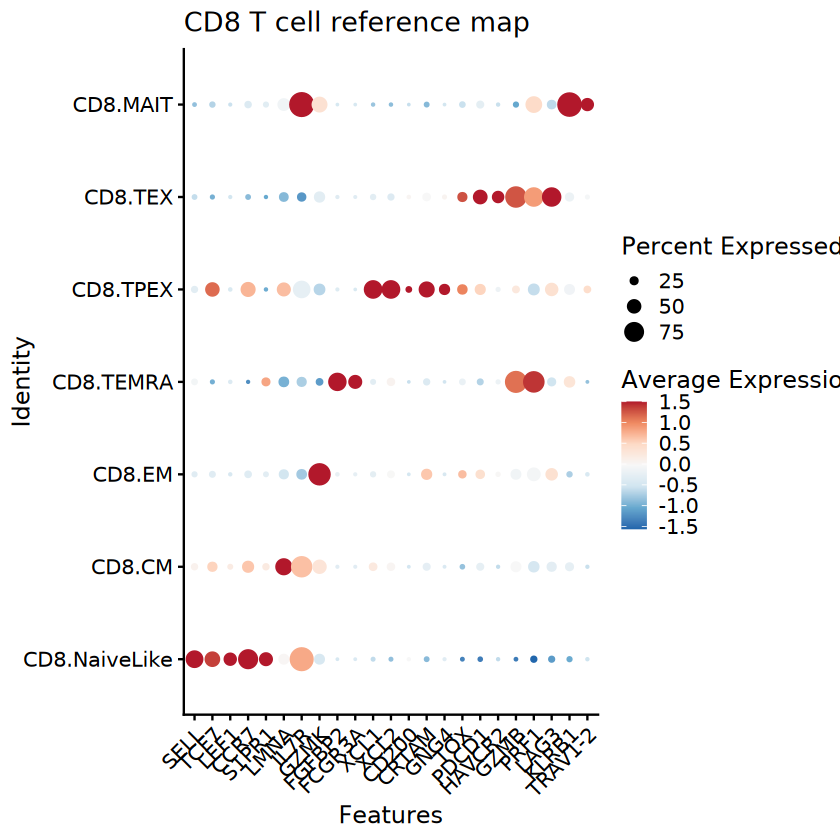

In [6]:
DefaultAssay(ref_cd8_human) <- "RNA"
Idents(ref_cd8_human) <- "functional.cluster"

genes <- c("SELL", "TCF7", "LEF1", "CCR7", "S1PR1", "LMNA", "IL7R", "GZMK", "FGFBP2",
    "FCGR3A", "XCL1", "XCL2", "CD200", "CRTAM", "GNG4", "TOX", "PDCD1", "HAVCR2",
    "GZMB", "PRF1", "LAG3", "KLRB1", "TRAV1-2")

DotPlot(ref_cd8_human, features = genes, cols = "RdBu", scale = T, col.max = 1.5) + theme(axis.text.x = element_text(angle = 45,
    hjust = 1)) + ggtitle("CD8 T cell reference map")

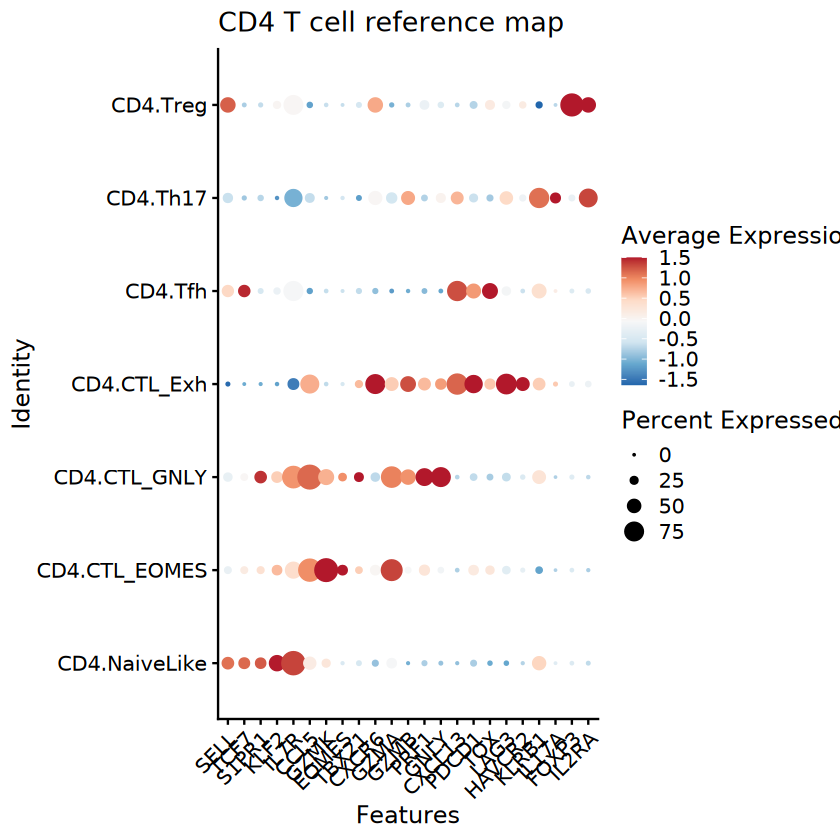

In [7]:
DefaultAssay(ref_cd4_human) <- "RNA"
Idents(ref_cd4_human) <- "functional.cluster"

genes <- c("SELL", "TCF7", "S1PR1", "KLF2", "IL7R", "CCL5", "GZMK", "EOMES", "TBX21",
    "CXCR6", "GZMA", "GZMB", "PRF1", "GNLY", "CXCL13", "PDCD1", "TOX", "LAG3", "HAVCR2",
    "KLRB1", "IL17A", "FOXP3", "IL2RA")

DotPlot(ref_cd4_human, features = genes, cols = "RdBu", scale = T, col.max = 1.5) + theme(axis.text.x = element_text(angle = 45,
    hjust = 1)) + ggtitle("CD4 T cell reference map")

# FINAL ANALYSIS TO THE 10 PATIENTS

We were only interested in human CD4 and CD8 TILS:

In [21]:
seurat_object <- readRDS("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/Seurat_concatenados_10_pt.rds")

In [22]:
dim(seurat_object)

[1] 23209 53542

In [23]:
seurat_object <- UpdateSeuratObject(seurat_object)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay 'RNA'

Object representation is consistent with the most current Seurat version



In [25]:
dim(seurat_object[["RNA"]]@counts)  # Datos crudos
dim(seurat_object[["RNA"]]@data)    # Datos normalizados

[1] 23209 53542

[1] 23209 53542

In [26]:
str(seurat_object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:115498997] 35 38 60 73 81 85 96 100 103 104 ...
  .. .. .. .. .. ..@ p       : int [1:53543] 0 1669 4402 6952 9086 11226 12871 15221 16837 18977 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 23209 53542
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:23209] "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
  .. .. .. .. .. .. ..$ : chr [1:53542] "AAACCTGAGAAGAAGC-1_PT14" "AAACCTGAGGACAGAA-1_PT14" "AAACCTGAGTGGAGTC-1_PT14" "AAACCTGAGTGTCTCA-1_PT14" ...
  .. .. .. .. .. ..@ x       : num [1:115498997] 2 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:115498997] 35 

In [27]:
seurat_object <- NormalizeData(seurat_object, normalization.method = "LogNormalize", scale.factor = 10000)

In [33]:
DefaultAssay(ref_cd8_human) <- "integrated"
seurat_object_CD8 <- ProjecTILs.classifier(
    seurat_object,
    ref = ref_cd8_human,
    split.by = "Sample")
# no usar filter.cell=FALSE que si no te las clasifica todas como CD8 y tenemos CD4

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 2945 pure 'Target' cells (46.81% of total)



[1] "3346 out of 6291 ( 53% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 3376 pure 'Target' cells (53.55% of total)



[1] "2928 out of 6304 ( 46% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 1628 pure 'Target' cells (26.57% of total)



[1] "4500 out of 6128 ( 73% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 3209 pure 'Target' cells (48.13% of total)



[1] "3458 out of 6667 ( 52% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 4558 pure 'Target' cells (65.30% of total)



[1] "2422 out of 6980 ( 35% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 112 pure 'Target' cells (24.19% of total)



[1] "351 out of 463 ( 76% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 545 pure 'Target' cells (33.37% of total)



[1] "1088 out of 1633 ( 67% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 757 pure 'Target' cells (15.25% of total)



[1] "4206 out of 4963 ( 85% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 1126 pure 'Target' cells (14.89% of total)



[1] "6437 out of 7563 ( 85% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 1705 pure 'Target' cells (26.03% of total)



[1] "4845 out of 6550 ( 74% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%



In [34]:
table(seurat_object_CD8$functional.cluster, useNA = "ifany")


       CD8.CM        CD8.EM      CD8.MAIT CD8.NaiveLike     CD8.TEMRA 
         4493          2431           373           398           413 
      CD8.TEX      CD8.TPEX          <NA> 
        10765          1088         33581 

In [37]:
dim(seurat_object_CD8)

[1] 23209 53542

In [38]:
# Classify CD4 T subtypes
DefaultAssay(ref_cd4_human) <- "integrated"
seurat_object_CD8_CD4 <- ProjecTILs.classifier(
    seurat_object_CD8,
    ref = ref_cd4_human,
    split.by = "Sample",
    overwrite = FALSE
)

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 2809 pure 'Target' cells (44.65% of total)



[1] "3482 out of 6291 ( 55% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 2262 pure 'Target' cells (35.88% of total)



[1] "4042 out of 6304 ( 64% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 3755 pure 'Target' cells (61.28% of total)



[1] "2373 out of 6128 ( 39% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 2754 pure 'Target' cells (41.31% of total)



[1] "3913 out of 6667 ( 59% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 1337 pure 'Target' cells (19.15% of total)



[1] "5643 out of 6980 ( 81% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 161 pure 'Target' cells (34.77% of total)



[1] "302 out of 463 ( 65% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 744 pure 'Target' cells (45.56% of total)



[1] "889 out of 1633 ( 54% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 3838 pure 'Target' cells (77.33% of total)



[1] "1125 out of 4963 ( 23% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 5771 pure 'Target' cells (76.31% of total)



[1] "1792 out of 7563 ( 24% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 4004 pure 'Target' cells (61.13% of total)



[1] "2546 out of 6550 ( 39% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%



In [39]:
table(seurat_object_CD8_CD4$functional.cluster, useNA = "ifany")


CD4.CTL_EOMES   CD4.CTL_Exh  CD4.CTL_GNLY CD4.NaiveLike       CD4.Tfh 
         4741           750          1301         13527          3698 
     CD4.Th17      CD4.Treg        CD8.CM        CD8.EM      CD8.MAIT 
          193          3217          4492          2428           373 
CD8.NaiveLike     CD8.TEMRA       CD8.TEX      CD8.TPEX          <NA> 
          398           413         10763          1086          6162 

In [42]:
# Guardar el objeto Seurat en el archivo especificado
saveRDS(seurat_object_CD8_CD4, file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/Seurat_ATLAS_projecTIL_10_pts.rds")


In [44]:
# Extraer las columnas necesarias del metadata
metadata <- seurat_object_CD8_CD4@meta.data %>%
  dplyr::select(barcode = rownames(.), functional.cluster, functional.cluster.conf)

ERROR: Error in seurat_object_CD8_CD4@meta.data %>% dplyr::select(barcode = rownames(.), : could not find function "%>%"


In [51]:
# Extraer las columnas necesarias del metadata
metadata <- seurat_object_CD8_CD4@meta.data
metadata$barcode <- rownames(metadata)  # Agregar la columna 'barcode'
metadata <- metadata[, c("barcode", "functional.cluster", "functional.cluster.conf")]

# Guardar como un archivo TSV con 'barcode' incluido


In [52]:
# Guardar como un archivo TSV
write.table(metadata, file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/anotacion_ATLAS_projecTIL_10pts.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

In [54]:
# Encontrar características variables (3000 en lugar de 500)
seurat_object_CD8_CD4 <- FindVariableFeatures(seurat_object_CD8_CD4, nfeatures = 3000)

In [55]:
# Escalar los datos
seurat_object_CD8_CD4 <- ScaleData(seurat_object_CD8_CD4)

Centering and scaling data matrix



In [60]:
# Ejecutar PCA (10 componentes principales)
seurat_object_CD8_CD4 <- RunPCA(seurat_object_CD8_CD4, ndims =30)

PC_ 30 
Positive:  TSC22D3, KLF6, SH2D1B, BAX, RHOB, PHLDA3, FKBP5, FCGR3A, KLRK1, CD7 
	   ATF3, BBC3, IL1R2, EZR, CCR8, FGFBP2, TRBC1, MALAT1, GADD45A, ADGRG1 
	   KLRF1, ENSG00000288755, S100A6, RPS27L, KLRC4, CD226, FXYD2, SMAP2, CCL3, TNFSF8 
Negative:  KIR2DL4, TRAV8-6, TRAV30, TRBV7-2, KLRC2, GPHN, KIR2DL3, HLA-DRB1, RAB34, S1PR1 
	   KRT86, TNFSF10, KLRC3, CD74, CD4, TRBV14, PHACTR2, HLA-DRA, PTPRM, BLK 
	   SLC3A2, SRGAP3, ST8SIA6, EPHA4, TUBA4A, MTFP1, TRBV20-1, MLLT3, TBC1D4, HDAC9 



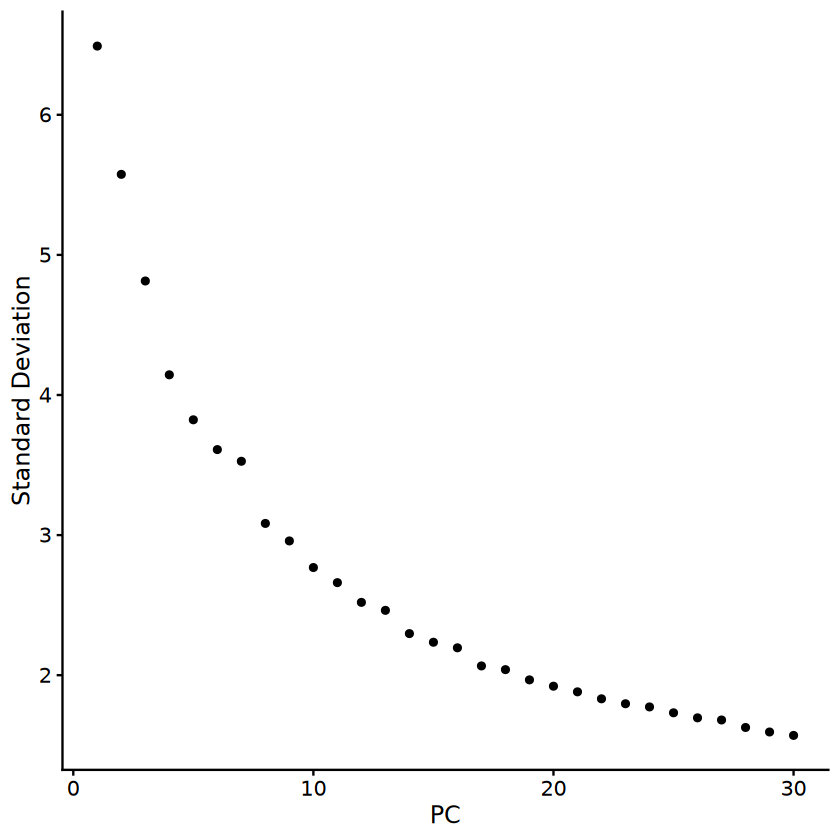

In [61]:
ElbowPlot(seurat_object_CD8_CD4, ndims = 30)

In [62]:
# Generar UMAP usando las primeras 30 PCs
seurat_object_CD8_CD4 <- RunUMAP(seurat_object_CD8_CD4, dims = 1:30)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
12:03:30 UMAP embedding parameters a = 0.9922 b = 1.112

12:03:30 Read 53542 rows and found 30 numeric columns

12:03:30 Using Annoy for neighbor search, n_neighbors = 30

12:03:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:03:36 Writing NN index file to temp file /home/evercher/tmpdir/RtmpFKEG24/file2dc5b6eceec86

12:03:36 Searching Annoy index using 1 thread, search_k = 3000

12:03:52 Annoy recall = 100%

12:03:53 Commencing smooth kNN distance calibration using 1 thread
 with t

## Other analysis to set up and understand the software with the 5 ovarian parients:

Seurat necesita el nombre de connectivities y distances de manera explicita, ya que en adata está en formato índice

In [59]:
# Leer las matrices de connectivities y distances
library(Matrix)
connectivities <- readMM("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/zz_datos_intermedios_scanpy_to_seurat/connectivities.mtx")
distances <- readMM("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/zz_datos_intermedios_scanpy_to_seurat/distances.mtx")

In [60]:
# Leer los nombres de las células
cell_names <- readLines("cell_names.csv")

# Asignar nombres a las filas y columnas de las matrices
rownames(connectivities) <- cell_names
colnames(connectivities) <- cell_names

rownames(distances) <- cell_names
colnames(distances) <- cell_names

In [61]:
# Asignar las matrices de gráficos
seurat_object@graphs[["connectivities"]] <- connectivities
seurat_object@graphs[["distances"]] <- distances

In [6]:
str(seurat_object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:73724765] 30 32 54 67 75 79 88 92 95 96 ...
  .. .. .. .. .. ..@ p       : int [1:32371] 0 1669 4400 6950 9083 11223 12868 15218 16834 18974 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 20001 32370
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:20001] "A1BG" "A1BG-AS1" "A2M" "A2M-AS1" ...
  .. .. .. .. .. .. ..$ : chr [1:32370] "AAACCTGAGAAGAAGC-1_PT14" "AAACCTGAGGACAGAA-1_PT14" "AAACCTGAGTGGAGTC-1_PT14" "AAACCTGAGTGTCTCA-1_PT14" ...
  .. .. .. .. .. ..@ x       : num [1:73724765] 2 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:647432370] 0 1 2

### TILAtlas_mouse

### Aplicar ProjecTILs:

In [3]:
# Cargar el atlas de referencia
ref_TILAtlas_mouse <- load.reference.map()

[1] "Loading Default Reference Atlas..."
[1] "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Scripts/ref_TILAtlas_mouse_v1.rds"
[1] "Loaded Custom Reference map ref_TILAtlas_mouse_v1"


           CD8_Tex           CD8_Tpex CD8_EffectorMemory     CD8_EarlyActiv 
         "#F8766D"          "#D39200"          "#93AA00"          "#00BA38" 
     CD8_NaiveLike      CD4_NaiveLike                Tfh                Th1 
         "#00C19F"          "#00B9E3"          "#619CFF"          "#DB72FB" 
              Treg 
         "#FF61C3" 


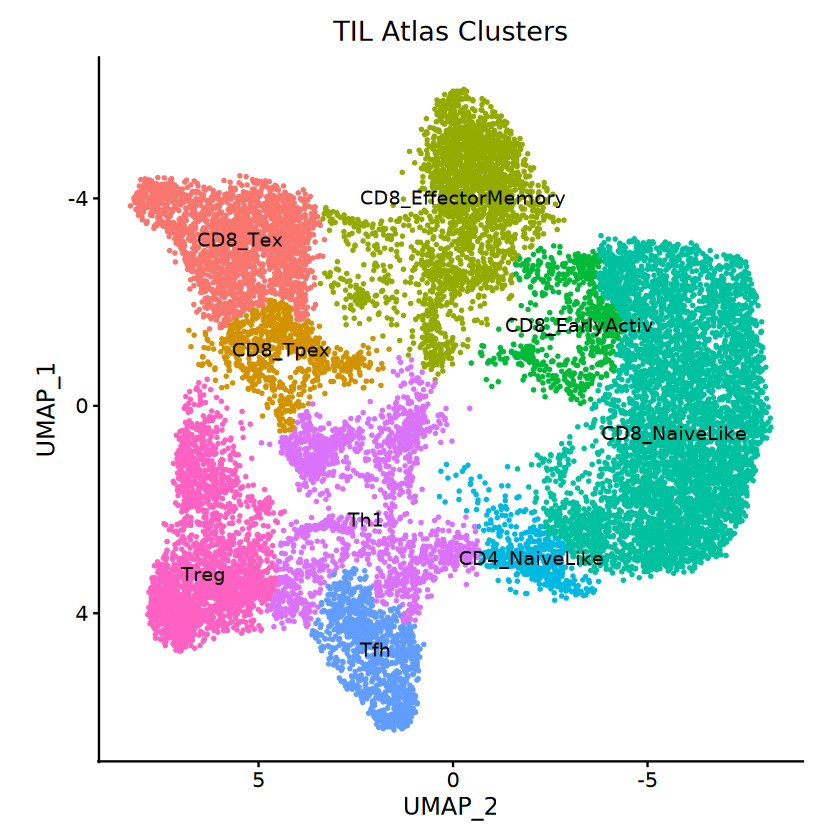

In [28]:
# Generar colores para 9 niveles
functional.cluster.colors <- hue_pal()(9)  # Genera 9 colores

# Asignar nombres a los colores según los niveles del functional.cluster
names(functional.cluster.colors) <- levels(ref_TILAtlas_mouse$functional.cluster)

# Verificar los colores generados
print(functional.cluster.colors)

# Visualizar el UMAP del atlas para confirmar los colores
DimPlot(
    ref_TILAtlas_mouse,
    reduction = "umap",
    label = TRUE,
    pt.size = 0.5,
    group.by = "functional.cluster",
    dims = c(2, 1),
    cols = functional.cluster.colors
) +
    NoLegend() +
    theme(aspect.ratio = 1) +
    scale_x_reverse() +
    scale_y_reverse() +
    ggtitle("TIL Atlas Clusters")

In [30]:
# Dimensiones del atlas: genes x células
dim(ref_TILAtlas_mouse)

[1]   800 16803

In [10]:
# Ejecutar Run.ProjecTILs
seurat_projected <- Run.ProjecTILs(
    query = seurat_object,
    ref = ref_TILAtlas_mouse,
    split.by = "Sample",
    filter.cells=FALSE,
)

  |                                                                      |   0%[1] "Using assay RNA for PT_14"
[1] "Transforming expression matrix into space of orthologs"
[1] "Aligning PT_14 to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...

Warning message:
"Number of dimensions changing from 50 to 15"



Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |==============                                                        |  20%[1] "Using assay RNA for PT_17"
[1] "Transforming expression matrix into space of orthologs"
[1] "Aligning PT_17 to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...

Warning message:
"Number of dimensions changing from 50 to 15"



Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |============================                                          |  40%[1] "Using assay RNA for PT_20"
[1] "Transforming expression matrix into space of orthologs"
[1] "Aligning PT_20 to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...

Warning message:
"Number of dimensions changing from 50 to 15"



Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |==========================================                            |  60%[1] "Using assay RNA for PT_22"
[1] "Transforming expression matrix into space of orthologs"
[1] "Aligning PT_22 to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...

Warning message:
"Number of dimensions changing from 50 to 15"



Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |========================================================              |  80%[1] "Using assay RNA for PT_28"
[1] "Transforming expression matrix into space of orthologs"
[1] "Aligning PT_28 to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...

Warning message:
"Number of dimensions changing from 50 to 15"



Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%



In [11]:
saveRDS(
    seurat_projected,
    file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/ATLAS_mouse_TIL.rds"
)

In [44]:
seurat_projected <- readRDS("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/ATLAS_mouse_TIL.rds")

In [30]:
plot.projection(
    ref = ref_TILAtlas_mouse,         # Atlas de referencia
    query.projected = seurat_projected, # Objeto proyectado
    linesize = 0.5,                   # Grosor de las líneas
    pointsize = 0.5                   # Tamaño de los puntos
) + ggtitle("Proyección de UMAP: Run.ProjecTILs con TIL Atlas")

In [13]:
# Subset para el Sample PT_14
query_patient <- subset(seurat_projected, subset = Sample == "PT_14")

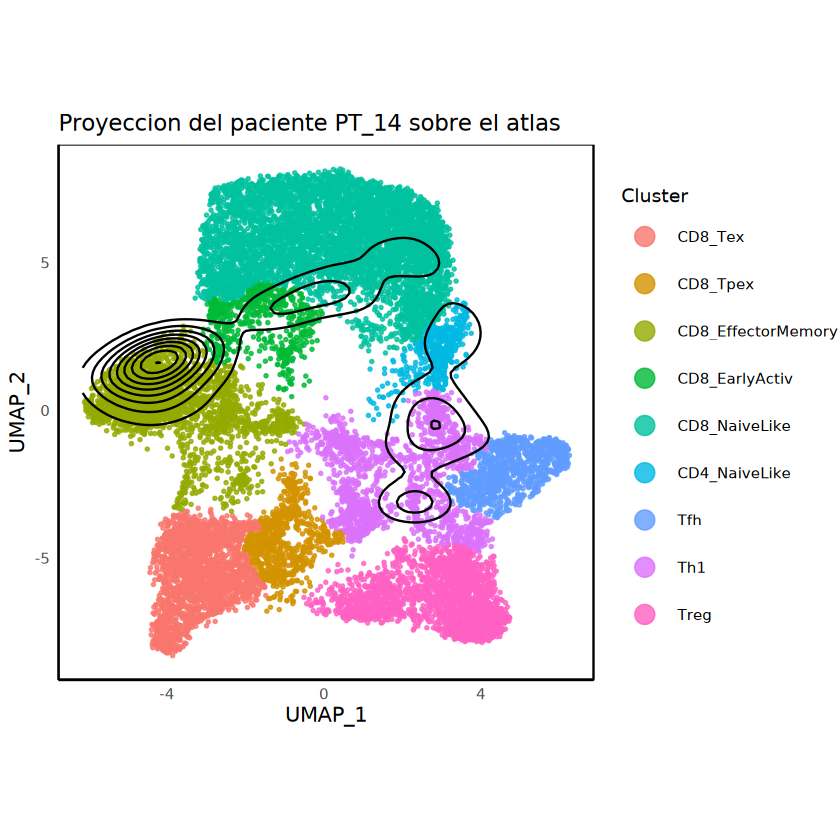

In [24]:
# Extraer las coordenadas UMAP del atlas
ref_coords <- as.data.frame(ref_TILAtlas_mouse@reductions$umap@cell.embeddings)
ref_coords$cluster <- ref_TILAtlas_mouse$functional.cluster

# Extraer las coordenadas UMAP del paciente proyectado
query_coords <- as.data.frame(query_patient@reductions$umap@cell.embeddings)
query_coords$cluster <- query_patient$functional.cluster

# Rotar las coordenadas verticalmente (180 grados en el eje vertical)
ref_coords$UMAP_1 <- ref_coords$UMAP_1
ref_coords$UMAP_2 <- -ref_coords$UMAP_2
query_coords$UMAP_1 <- query_coords$UMAP_1
query_coords$UMAP_2 <- -query_coords$UMAP_2

# Crear el gráfico
ggplot() +
  # Puntos del atlas de referencia
  geom_point(
    data = ref_coords,
    aes(x = UMAP_1, y = UMAP_2, color = cluster),
    alpha = 0.8, size = 0.5
  ) +
  # Contornos de densidad del paciente proyectado
  geom_density_2d(
    data = query_coords,
    aes(x = UMAP_1, y = UMAP_2),
    color = "black",
    size = 0.5
  ) +
  # Colores del atlas
  scale_color_manual(values = functional.cluster.colors) +
  # Ejes con marcos visibles
  theme_minimal() +
  theme(
    panel.border = element_rect(fill = NA, color = "black"),
    axis.line = element_line(color = "black"),
    axis.title = element_text(size = 12, face = "bold"),
    panel.grid = element_blank(),
    aspect.ratio = 1,
    legend.position = "right",
    legend.key.size = unit(1, "cm"),    # Tamaño del cuadro en la leyenda
    legend.key.width = unit(1, "cm")    # Ancho del cuadro en la leyenda
  ) +
  labs(
    x = "UMAP_1",
    y = "UMAP_2",
    title = "Proyeccion del paciente PT_14 sobre el atlas"
  ) +
  guides(color = guide_legend(title = "Cluster", override.aes = list(size = 5)))


In [36]:
# Inicializar una lista para almacenar los gráficos
umap_plots <- list()

# Dividir el objeto Seurat proyectado por paciente
seurat_list <- SplitObject(seurat_projected, split.by = "Sample")

# Iterar sobre cada paciente
for (i in seq_along(seurat_list)) {
    patient <- names(seurat_list)[i]
    query_patient <- seurat_list[[i]]
    
    # Extraer las coordenadas UMAP del atlas
    ref_coords <- as.data.frame(ref_TILAtlas_mouse@reductions$umap@cell.embeddings)
    ref_coords$cluster <- ref_TILAtlas_mouse$functional.cluster

    # Extraer las coordenadas UMAP del paciente proyectado
    query_coords <- as.data.frame(query_patient@reductions$umap@cell.embeddings)
    query_coords$cluster <- query_patient$functional.cluster

    # Rotar las coordenadas verticalmente (180 grados en el eje vertical)
    ref_coords$UMAP_1 <- ref_coords$UMAP_1
    ref_coords$UMAP_2 <- -ref_coords$UMAP_2
    query_coords$UMAP_1 <- query_coords$UMAP_1
    query_coords$UMAP_2 <- -query_coords$UMAP_2

    # Crear el gráfico para cada paciente
    umap_plots[[i]] <- ggplot() +
        # Puntos del atlas de referencia
        geom_point(
            data = ref_coords,
            aes(x = UMAP_1, y = UMAP_2, color = cluster),
            alpha = 0.8, size = 0.5
        ) +
        # Contornos de densidad del paciente proyectado
        geom_density_2d(
            data = query_coords,
            aes(x = UMAP_1, y = UMAP_2),
            color = "black",
            size = 0.5
        ) +
        # Colores del atlas
        scale_color_manual(values = functional.cluster.colors) +
        # Ejes con marcos visibles
        theme_minimal() +
        theme(
            panel.border = element_rect(fill = NA, color = "black"),
            axis.line = element_line(color = "black"),
            axis.title = element_text(size = 12, face = "bold"),
            panel.grid = element_blank(),
            aspect.ratio = 1,
            legend.position = "right",
            legend.key.size = unit(1, "cm"),    # Tamaño del cuadro en la leyenda
            legend.key.width = unit(1, "cm")    # Ancho del cuadro en la leyenda
        ) +
        labs(
            x = "UMAP_1",
            y = "UMAP_2",
            title = paste("Proyeccion del paciente", patient, "sobre el atlas")
        ) +
        guides(color = guide_legend(title = "Cluster", override.aes = list(size = 5)))

    # Guardar el gráfico de cada paciente en un PDF
    ggsave(paste0("UMAP_Projection_", patient, ".pdf"), plot = umap_plots[[i]])
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


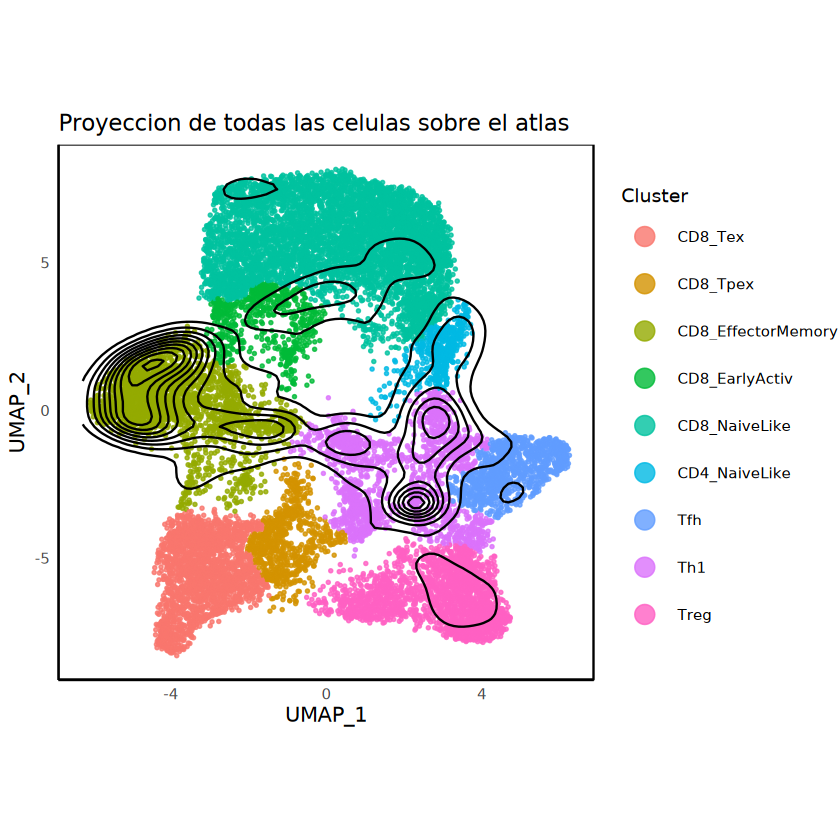

In [102]:
# Extraer las coordenadas UMAP del atlas
# Extraer las coordenadas UMAP del atlas
ref_coords <- as.data.frame(ref_TILAtlas_mouse@reductions$umap@cell.embeddings)
ref_coords$cluster <- ref_TILAtlas_mouse$functional.cluster

# Extraer las coordenadas UMAP de todo el objeto proyectado
query_coords <- as.data.frame(seurat_projected@reductions$umap@cell.embeddings)
query_coords$cluster <- seurat_projected$functional.cluster

# Rotar las coordenadas verticalmente (180 grados en el eje vertical)
ref_coords$UMAP_1 <- ref_coords$UMAP_1
ref_coords$UMAP_2 <- -ref_coords$UMAP_2
query_coords$UMAP_1 <- query_coords$UMAP_1
query_coords$UMAP_2 <- -query_coords$UMAP_2

# Crear el gráfico
ggplot() +
  # Puntos del atlas de referencia
  geom_point(
    data = ref_coords,
    aes(x = UMAP_1, y = UMAP_2, color = cluster),
    alpha = 0.8, size = 0.5
  ) +
  # Contornos de densidad del paciente proyectado (todo el objeto proyectado)
  geom_density_2d(
    data = query_coords,
    aes(x = UMAP_1, y = UMAP_2),
    color = "black",
    size = 0.5
  ) +
  # Colores del atlas
  scale_color_manual(values = functional.cluster.colors) +
  # Ejes con marcos visibles
  theme_minimal() +
  theme(
    panel.border = element_rect(fill = NA, color = "black"),
    axis.line = element_line(color = "black"),
    axis.title = element_text(size = 12, face = "bold"),
    panel.grid = element_blank(),
    aspect.ratio = 1,
    legend.position = "right",
    legend.key.size = unit(1, "cm"),    # Tamaño del cuadro en la leyenda
    legend.key.width = unit(1, "cm")    # Ancho del cuadro en la leyenda
  ) +
  labs(
    x = "UMAP_1",
    y = "UMAP_2",
    title = "Proyeccion de todas las celulas sobre el atlas"
  ) +
  guides(color = guide_legend(title = "Cluster", override.aes = list(size = 5)))



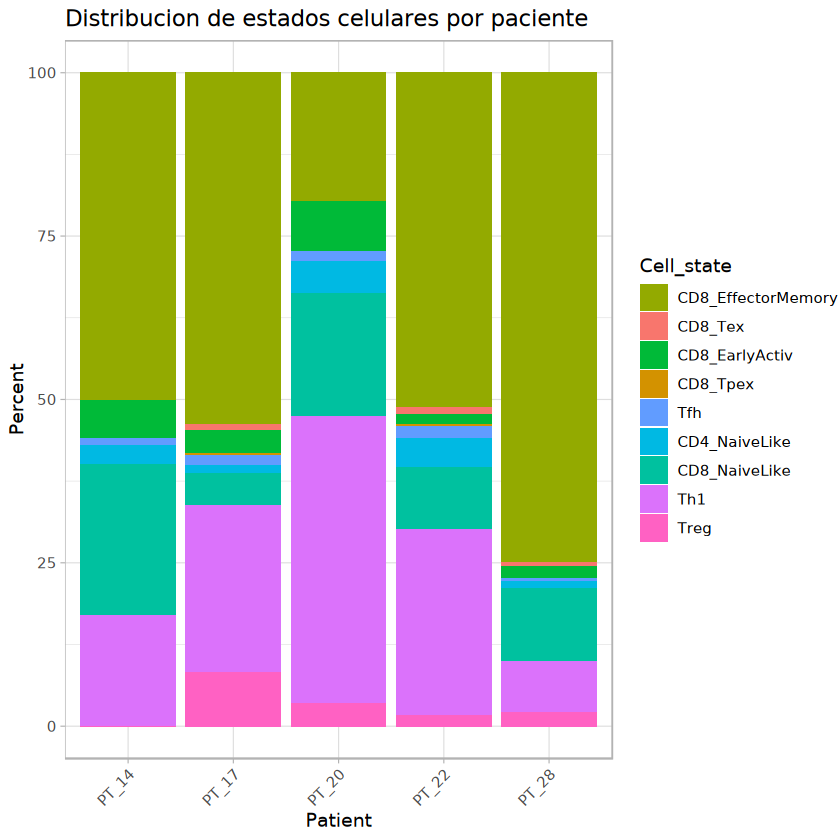

In [49]:
# Obtener los estados celulares y colores relevantes
cols_use <- functional.cluster.colors[c(3, 1, 4, 2, 7, 6, 5, 8, 9)] # Asegúrate de incluir todos los colores necesarios
states_all <- levels(factor(names(functional.cluster.colors), levels = names(cols_use)))

# Crear una matriz para almacenar las proporciones por paciente
patients <- unique(seurat_projected$Sample)
m <- matrix(nrow = length(patients), ncol = length(states_all))
rownames(m) <- patients
colnames(m) <- states_all

# Calcular proporciones por paciente
for (patient in patients) {
    query_patient <- subset(seurat_projected, subset = Sample == patient)
    tb <- table(factor(query_patient$functional.cluster, levels = states_all))
    m[patient, ] <- tb * 100 / sum(tb)
}

# Transformar la matriz en formato "melt"
melt <- reshape2::melt(m)
colnames(melt) <- c("Patient", "Cell_state", "Percent")

# Crear el gráfico de barras apiladas
bar_plot <- ggplot(melt, aes(x = Patient, y = Percent, fill = Cell_state)) +
    geom_bar(stat = "identity", position = "stack") +
    scale_fill_manual(values = functional.cluster.colors) +
    theme_light() +
    theme(
        legend.position = "right",
        axis.text.x = element_text(angle = 45, hjust = 1)
    ) +
    ggtitle("Distribucion de estados celulares por paciente")

# Mostrar el gráfico
print(bar_plot)

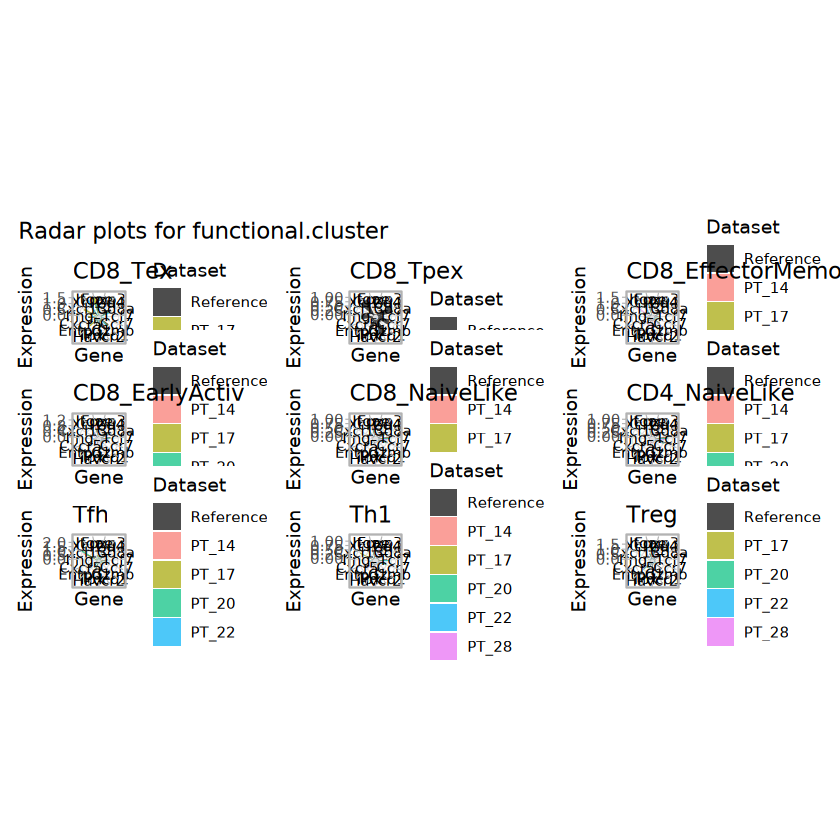

In [40]:
query.list <- SplitObject(seurat_projected, split.by = "Sample")
plot.states.radar(ref_TILAtlas_mouse, query = query.list, min.cells = 50, genes4radar = c("Foxp3",
    "Cd4", "Cd8a", "Tcf7", "Ccr7", "Gzmb", "Pdcd1", "Havcr2", "Tox", "Entpd1", "Cxcr5",
    "Ifng", "Cxcl13", "Xcl1", "Itgae"))

### Run.ProjecTILs: 

In [ ]:
# Aplicar ProjecTILs.classifier
seurat_object <- ProjecTILs.classifier(
    query = seurat_object,
    ref = ref_TILAtlas_mouse,
    split.by = "Sample",
    overwrite = FALSE,
    filter.cells = FALSE)

# Guardar los resultados en columnas separadas
seurat_object@meta.data$functional.cluster_TILAtlas_mouse <- seurat_object@meta.data$functional.cluster
seurat_object@meta.data$functional.cluster.conf_TILAtlas_mouse <- seurat_object@meta.data$functional.cluster.conf

# Eliminar las columnas originales para evitar conflictos
seurat_object@meta.data$functional.cluster <- NULL
seurat_object@meta.data$functional.cluster.conf <- NULL

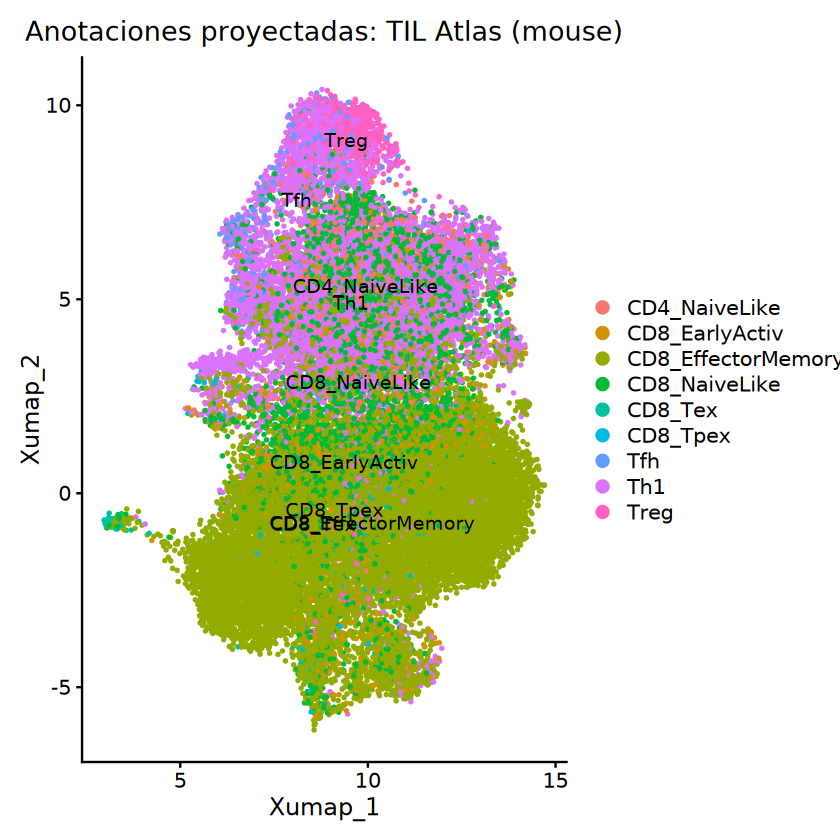

In [24]:
DimPlot(
    object = seurat_object,
    reduction = "Xumap_",  # Cambia a tu reducción UMAP activa
    group.by = "functional.cluster_TILAtlas_mouse",
    label = TRUE,
    pt.size = 0.5
) + ggtitle("Anotaciones proyectadas: TIL Atlas (mouse)")


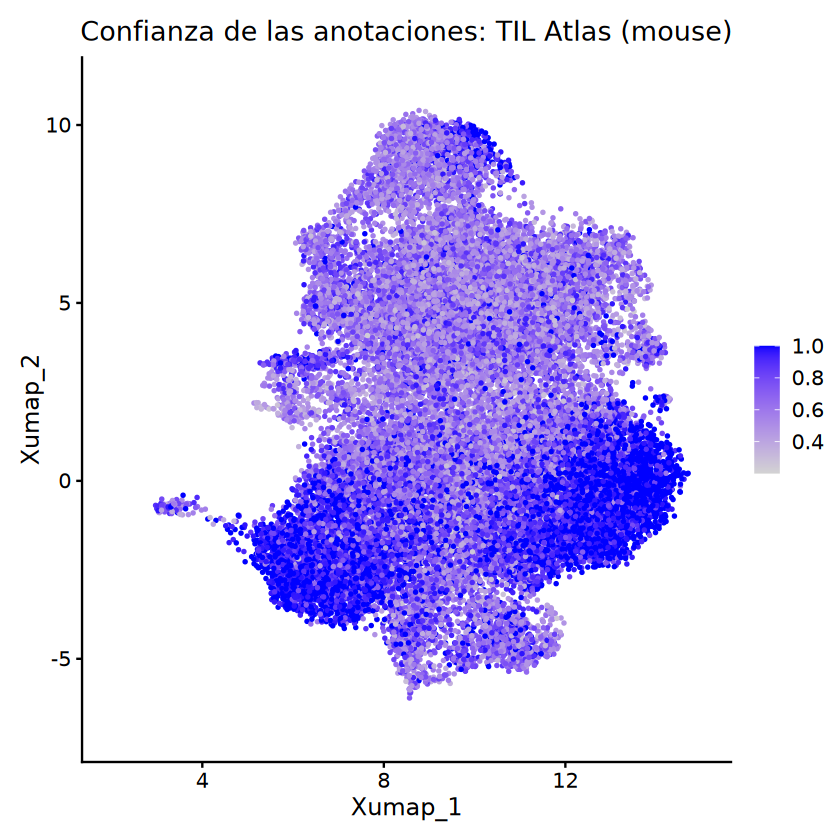

In [25]:
FeaturePlot(
    object = seurat_object,
    reduction = "Xumap_",  # Cambia a tu reducción UMAP activa
    features = "functional.cluster.conf_TILAtlas_mouse",
    pt.size = 0.5
) + ggtitle("Confianza de las anotaciones: TIL Atlas (mouse)")

#### CD8 TILs

In [5]:
dim(seurat_object)

[1] 23209 53542

In [6]:
# Classify CD8 T subtypes
DefaultAssay(ref_cd8_human) <- "integrated"
seurat_object_CD8 <- ProjecTILs.classifier(
    seurat_object,
    ref = ref_cd8_human,
    split.by = "Sample")

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 2945 pure 'Target' cells (46.81% of total)



[1] "3346 out of 6291 ( 53% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...


### Detected a total of 3376 pure 'Target' cells (53.55% of total)



[1] "2928 out of 6304 ( 46% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space
  |======================================================================| 100%

[1] "Using assay RNA for query"                                          |   0%


Pre-filtering cells with scGate...



In [64]:
table(seurat_object_CD8$functional.cluster, useNA = "ifany")


       CD8.CM        CD8.EM      CD8.MAIT CD8.NaiveLike     CD8.TEMRA 
         4169          1773           195           414           310 
      CD8.TEX      CD8.TPEX          <NA> 
         8483           334         16692 

In [65]:
str(seurat_object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:73724765] 30 32 54 67 75 79 88 92 95 96 ...
  .. .. .. .. .. ..@ p       : int [1:32371] 0 1669 4400 6950 9083 11223 12868 15218 16834 18974 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 20001 32370
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:20001] "A1BG" "A1BG-AS1" "A2M" "A2M-AS1" ...
  .. .. .. .. .. .. ..$ : chr [1:32370] "AAACCTGAGAAGAAGC-1_PT14" "AAACCTGAGGACAGAA-1_PT14" "AAACCTGAGTGGAGTC-1_PT14" "AAACCTGAGTGTCTCA-1_PT14" ...
  .. .. .. .. .. ..@ x       : num [1:73724765] 2 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:647432370] 0 1 2

#### CD4 TILs

In [66]:
# Classify CD4 T subtypes
DefaultAssay(ref_cd4_human) <- "integrated"
seurat_object_CD8_CD4 <- ProjecTILs.classifier(
    seurat_object_CD8,
    ref = ref_cd4_human,
    split.by = "Sample",
    overwrite = FALSE
)

[1] "Using assay RNA for query"
                                         |   0%

Pre-filtering cells with scGate...


### Detected a total of 2809 pure 'Target' cells (44.65% of total)



[1] "3482 out of 6291 ( 55% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


[1] "Using assay RNA for query"
                                         |   0%

Pre-filtering cells with scGate...


### Detected a total of 2259 pure 'Target' cells (35.83% of total)



[1] "4045 out of 6304 ( 64% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


[1] "Using assay RNA for query"
                                         |   0%

Pre-filtering cells with scGate...


### Detected a total of 3749 pure 'Target' cells (61.18% of total)



[1] "2379 out of 6128 ( 39% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


[1] "Using assay RNA for query"
                                         |   0%

Pre-filtering cells with scGate...


### Detected a total of 2758 pure 'Target' cells (41.37% of total)



[1] "3909 out of 6667 ( 59% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


[1] "Using assay RNA for query"
                                         |   0%

Pre-filtering cells with scGate...


### Detected a total of 1347 pure 'Target' cells (19.30% of total)



[1] "5633 out of 6980 ( 81% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Warning message:
"Layer counts isn't present in the assay object[[assay]]; returning NULL"
Preparing PCA embeddings for objects...




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


|======================================================================| 100%

In [67]:
table(seurat_object_CD8_CD4$functional.cluster, useNA = "ifany")


CD4.CTL_EOMES   CD4.CTL_Exh  CD4.CTL_GNLY CD4.NaiveLike       CD4.Tfh 
         1379           420           593          6691          1919 
     CD4.Th17      CD4.Treg        CD8.CM        CD8.EM      CD8.MAIT 
          111          1785          4161          1770           195 
CD8.NaiveLike     CD8.TEMRA       CD8.TEX      CD8.TPEX          <NA> 
          413           309          8473           333          3818 

In [ ]:
# BORRAR LA COLUMNA CELL TYPE

In [104]:
# Eliminar la columna 'cell_type'
seurat_object_CD8_CD4$cell_type <- NULL

In [107]:
saveRDS(
    seurat_object_CD8_CD4,
    file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/ATLAS_h_TIL_CD4_CD8.rds"
)

In [ ]:
# Asignar niveles de los clusters correctamente
levels_clusters <- c("CD4.CTL_EOMES", "CD4.CTL_Exh", "CD4.CTL_GNLY", "CD4.NaiveLike", "CD4.Tfh", 
                     "CD4.Th17", "CD4.Treg", "CD8.CM", "CD8.EM", "CD8.MAIT", 
                     "CD8.NaiveLike", "CD8.TEMRA", "CD8.TEX", "CD8.TPEX")

# Asegurarse de que la columna 'functional.cluster' tenga los niveles adecuados
seurat_object_CD8_CD4$functional.cluster <- factor(seurat_object_CD8_CD4$functional.cluster, levels = levels_clusters)

# Crear una tabla de conteo de las células por cada paciente
patients <- unique(seurat_object_CD8_CD4$Sample)
m <- matrix(nrow = length(patients), ncol = length(levels_clusters))
rownames(m) <- patients
colnames(m) <- levels_clusters

# Calcular la distribución porcentual por paciente
for (patient in patients) {
    query_patient <- subset(seurat_object_CD8_CD4, subset = Sample == patient)
    tb <- table(factor(query_patient$functional.cluster, levels = levels_clusters))
    m[patient, ] <- tb * 100 / sum(tb)  # Cálculo de porcentaje
}

# Transformar la matriz en formato "melt" para ggplot
melt <- reshape2::melt(m)
colnames(melt) <- c("Patient", "Cell_state", "Percent")

# Crear el gráfico de barras apiladas
bar_plot <- ggplot(melt, aes(x = Patient, y = Percent, fill = Cell_state)) +
    geom_bar(stat = "identity", position = "stack") +
    scale_fill_manual(values = functional.cluster.colors) +  # Usar los colores correspondientes
    theme_light() +
    theme(
        legend.position = "right",
        axis.text.x = element_text(angle = 45, hjust = 1)
    ) +
    ggtitle("Distribución de estados celulares por paciente")

# Mostrar el gráfico
print(bar_plot)

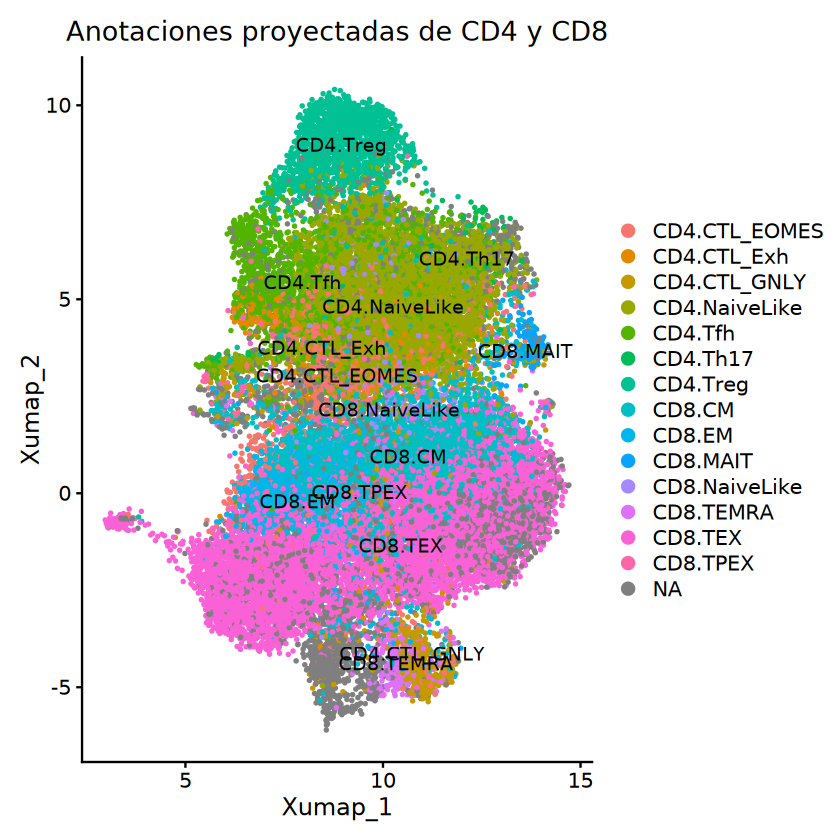

In [99]:
# Cambiar la columna activa a la anotación de funcionalidad celular para CD4 y CD8
seurat_object_CD8_CD4$active_annotation <- seurat_object_CD8_CD4$functional.cluster

# Generar el UMAP con las anotaciones de funcionalidad celular
DimPlot(
    object = seurat_object_CD8_CD4,
    reduction = "Xumap_",        # Asegúrate de que la reducción esté correctamente especificada
    group.by = "active_annotation",
    label = TRUE,
    pt.size = 0.5
) + ggtitle("Anotaciones proyectadas de CD4 y CD8")

We can verify the expression profile using a panel of marker genes.

In [100]:
# Definir los genes que se van a usar en el radar plot
genes4radar <- c("CD4", "CD8A", "TCF7", "CCR7", "IL7R", "LMNA", "GZMA", "GZMK", "FGFBP2",
                 "XCL1", "CD200", "CRTAM", "TOX", "PDCD1", "HAVCR2", "PRF1", "GLNY", "GZMB", 
                 "TRAV1-2", "KLRB1", "FOXP3")

# Especificamos la ruta del archivo PDF donde se guardará el gráfico
pdf("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/plot_states_radar.pdf", 
    width = 12, height = 10)  # Tamaño ajustable del gráfico

# Ejecutar la función plot.states.radar para el CD8
plot.states.radar(ref = ref_cd8_human, query = seurat_object_CD8_CD4, genes4radar = genes4radar, min.cells = 20)

# Ejecutar la función plot.states.radar para el CD4
plot.states.radar(ref = ref_cd4_human, query = seurat_object_CD8_CD4, genes4radar = genes4radar, min.cells = 20)

# Cerrar el archivo PDF
dev.off()

Warning message in plot.states.radar(ref = ref_cd8_human, query = seurat_object_CD8_CD4, :
"Some gene symbols were not found:
GLNY"
Warning message in plot.states.radar(ref = ref_cd4_human, query = seurat_object_CD8_CD4, :
"Some gene symbols were not found:
GLNY"


pdf 
  2

In [105]:
# Exportar el metadata como archivo TSV
write.table(seurat_object_CD8_CD4@meta.data, 
            file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/ATLAS_CD4_CD8_metadata.tsv", 
            sep = "\t", row.names = FALSE, col.names = TRUE)

In [106]:
# Exportar el metadata como archivo TSV
write.table(seurat_projected@meta.data, 
            file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/firmas_transcriptomicas/ATLAS_TIL_mouse_metadata.tsv", 
            sep = "\t", row.names = FALSE, col.names = TRUE)

#### Ref_LCMV_Atlas_mouse 
https://carmonalab.github.io/ProjecTILs_CaseStudies/Sandu_LCMV.html#projectils-analysis

In [60]:
# Cargar el atlas de referencia
ref_LCMV_Atlas_mouse <- load.reference.map(
  ref = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Atlas_scRNA/ref_LCMV_Atlas_mouse_v1.rds"
)

[1] "Loading Custom Reference Atlas..."
[1] "Loaded Custom Reference map ref_LCMV_Atlas_mouse_v1"


In [61]:
ref_LCMV_Atlas_mouse@images <- list()

In [ ]:
# Configurar el assay activo
DefaultAssay(ref_LCMV_Atlas_mouse) <- "integrated"

# Aplicar ProjecTILs
seurat_object <- ProjecTILs.classifier(
  query = seurat_object,
  ref = ref_LCMV_Atlas_mouse,
  split.by = "Sample",
  overwrite = FALSE,
  filter.cells = FALSE,
  human.ortho = TRUE
)

# Guardar resultados en columnas separadas
seurat_object@meta.data$functional.cluster_LCMV_Atlas_mouse <- seurat_object@meta.data$functional.cluster
seurat_object@meta.data$functional.cluster.conf_LCMV_Atlas_mouse <- seurat_object@meta.data$functional.cluster.conf

# Eliminar columnas originales para evitar conflictos
seurat_object@meta.data$functional.cluster <- NULL
seurat_object@meta.data$functional.cluster.conf <- NULL

### Memory phenotypes of CD4+ T cells after acute infection

In [ ]:
# Cargar el atlas de referencia
ref_LCMV_CD4_mouse <- load.reference.map(ref = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Atlas_scRNA/ref_LCMV_CD4_mouse_release_v1.rds")

# Aplicar ProjecTILs
seurat_object <- ProjecTILs.classifier(
    query = seurat_object,
    ref = ref_LCMV_CD4_mouse,
    split.by = "Sample",
    overwrite = FALSE,
    filter.cells = FALSE,
    human.ortho = TRUE
)

# Guardar los resultados en columnas separadas para este atlas
seurat_object@meta.data$functional.cluster_LCMV_CD4_mouse <- seurat_object@meta.data$functional.cluster
seurat_object@meta.data$functional.cluster.conf_LCMV_CD4_mouse <- seurat_object@meta.data$functional.cluster.conf

# Eliminar las columnas originales para evitar conflictos
seurat_object@meta.data$functional.cluster <- NULL
seurat_object@meta.data$functional.cluster.conf <- NULL

Está mal, los que son de raton hay qeu volverlos a correr con el argumentos human.ortho = TRUE